<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/mnist_keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [18]:
(xtrain, ytrain), (xtest, ytest) = load_data()
xtrain = xtrain.astype('float32') /255.
xtest = xtest.astype('float32') /255.
ytrain=to_categorical(ytrain)
ytest =to_categorical(ytest)

xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000, 28*28)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


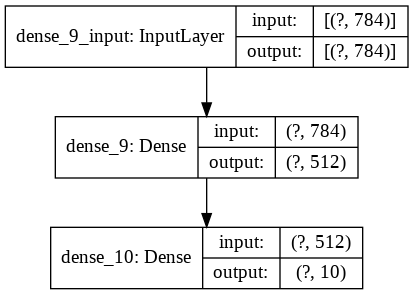

In [22]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28, )))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='mnist_keras.png', show_shapes=True, show_layer_names=True)

In [24]:
model.fit(xtrain, ytrain, epochs=10, batch_size=128)
test_loss, test_accu = model.evaluate(xtest, ytest)
print(test_loss, test_accu)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2541 - accuracy: 0.9265
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1015 - accuracy: 0.9703
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0673 - accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0212 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0164 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accurac

0.07155060023069382 0.9822999835014343
Precision score: 0.9822364808626205
Recall score   : 0.9822099059376465
Confusion Matrix
[[ 972    0    1    0    1    0    2    1    3    0]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   3    1 1007    1    6    0    3    5    5    1]
 [   0    0    3  990    0    2    0    3    5    7]
 [   1    0    0    1  972    0    5    0    1    2]
 [   3    0    0    6    1  874    2    0    3    3]
 [   4    2    1    1    2    3  944    0    1    0]
 [   1    3    7    3    3    0    0 1002    4    5]
 [   2    0    1    1    5    2    2    3  954    4]
 [   1    2    0    4   17    1    0    3    1  980]]


<Figure size 432x288 with 0 Axes>

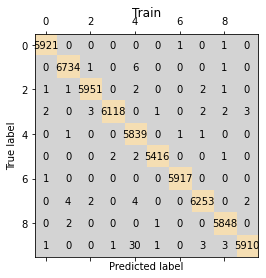

<Figure size 432x288 with 0 Axes>

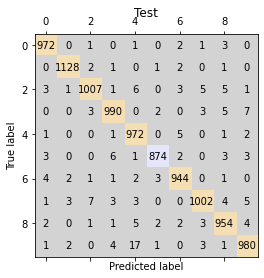

In [25]:
ypred = model.predict(xtest)

predicted_labels = np.argmax(ypred, axis=-1)
actual_labels = np.argmax(ytest, axis=-1)

print('Precision score:', precision_score(actual_labels, predicted_labels, average='macro'))
print('Recall score   :', recall_score(actual_labels, predicted_labels, average='macro'))


print('Confusion Matrix')
print(confusion_matrix(ytest.argmax(1), ypred.argmax(1)))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(ytest, ypred, title):
  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(ytrain.argmax(1), model.predict(xtrain).argmax(1), title='Train')
cm(ytest.argmax(1), model.predict(xtest).argmax(1), title='Test')